In [1]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors as rdmd
import pandas as pd
from tqdm import tqdm
import time
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("All_external_test_Sets.csv")

In [3]:
def MorganFingerprint(s):
    x = Chem.MolFromSmiles(s)
    return (AllChem.GetMorganFingerprintAsBitVect(x,2,2048))

def GetMACCSkeys(s):
    x = Chem.MolFromSmiles(s)
    return (MACCSkeys.GenMACCSKeys(x))

from rdkit.Chem import MACCSkeys
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols

In [4]:
from pandarallel import pandarallel

In [5]:
def addfps(data, fn, nm):
    pandarallel.initialize()
    array=[]
    array = np.stack(data['smiles_r'].parallel_apply(fn))
    collection = []
    for x in np.arange(array.shape[1]):
        x = nm+str(x)
        collection.append(x)
    table = pd.DataFrame(array, columns=collection)
    df= pd.concat([data, table], axis=1)
    return df

In [6]:
df=addfps(df, MorganFingerprint, 'M')

INFO: Pandarallel will run on 112 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [7]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
import pandas as pd

#Morgan Fingerprint Correlations
#Active vs Inactive

from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
import pandas as pd

    # proof and make a list of SMILES
def calculate_similarity_alldata(data):
    
    df_smiles = data['smiles_r']
    c_smiles = []
    
    for ds in df_smiles:
        try:
            cs = Chem.CanonSmiles(ds)
            c_smiles.append(cs)
        except:
            print('Invalid SMILES:', ds)
    print()

    # make a list of mols
    ms = [Chem.MolFromSmiles(x) for x in c_smiles]

    # make a list of fingerprints (fp)
    fps = [AllChem.GetMorganFingerprintAsBitVect(x, radius=2, nBits=2048) for x in ms]
    print(len(fps))

    # the list for the dataframe
    qu, ta, sim = [], [], []

    # compare all fp pairwise without duplicates
    for n in range(len(fps)): # -1 so the last fp will not be used
        s = DataStructs.BulkTanimotoSimilarity(fps[n], fps[:]) # +1 compare with the next to the last fp
        #print(c_smiles[n], c_smiles[n+1:]) # witch mol is compared with what group
        # collect the SMILES and values
        for m in range(len(s)):
            qu.append(c_smiles[n])
            ta.append(c_smiles[:][m])
            sim.append(s[m])


    # build the dataframe and sort it
    d = {'query':qu, 'target':ta, 'MFP_Tc':sim}
    df_final_aa = pd.DataFrame(data=d)
    df_final_aa = df_final_aa.sort_values('MFP_Tc', ascending=False)
    df_final_aa=df_final_aa.reset_index()
    #df_final_aa = df_final_aa[df_final_aa["query"] != df_final_aa["target"]]
    return(df_final_aa)

    # save as csv
    #df_final.to_csv('third.csv', index=False, sep=',')

In [8]:
df

,smiles_r,human_CL_mL_min_kg,human_VDss_L_kg,human_fup,human_thalf,M0,M1,M2,M3,M4,...,M2038,M2039,M2040,M2041,M2042,M2043,M2044,M2045,M2046,M2047
0,C/[NH+]=C1/C[NH+](O)C(c2ccccc2)=c2cc(Cl)ccc2=N1,0.37,0.25,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,C1=C/COCc2cc(ccc2OCC[NH+]2CCCC2)Nc2nccc(n2)-c2...,0.58,3.82,0.01,27.7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,C=C/C=C/C[C@@H](C)[C@@H](O)C1C(=O)NC(CC)C(=O)[...,17.67,35.90,0.03,30.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,C=C1CC[C@]2(O)[C@@H]3Cc4ccc([O-])c5c4[C@]2(CC[...,14.40,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,C=C1C[C@@H]2C(CC[C@]3(C)C(=O)CC[C@@H]23)[C@]2(...,145.00,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,[O-]c1ccc(CC[NH2+]CCCCCC[NH2+]CCc2ccccc2)cc1[O-],36.00,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311,[O-]c1ccc2c(c1)C13CCCC[C@@]1(O)[C@H](C2)[NH+](...,40.00,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
312,[O-]c1ccc2c3c1O[C@@H]1[C@@H](O)CC[C@]4(O)[C@H]...,29.70,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,[O-]c1ncnc2[n-]ncc12,9.90,NaN,NaN,NaN,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [9]:
selected_dataset =df[df["human_fup"]!=np.nan].reset_index(drop=True)
selected_dataset

,smiles_r,human_CL_mL_min_kg,human_VDss_L_kg,human_fup,human_thalf,M0,M1,M2,M3,M4,...,M2038,M2039,M2040,M2041,M2042,M2043,M2044,M2045,M2046,M2047
0,C/[NH+]=C1/C[NH+](O)C(c2ccccc2)=c2cc(Cl)ccc2=N1,0.37,0.25,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,C1=C/COCc2cc(ccc2OCC[NH+]2CCCC2)Nc2nccc(n2)-c2...,0.58,3.82,0.01,27.7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,C=C/C=C/C[C@@H](C)[C@@H](O)C1C(=O)NC(CC)C(=O)[...,17.67,35.90,0.03,30.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,C=C1CC[C@]2(O)[C@@H]3Cc4ccc([O-])c5c4[C@]2(CC[...,14.40,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,C=C1C[C@@H]2C(CC[C@]3(C)C(=O)CC[C@@H]23)[C@]2(...,145.00,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,[O-]c1ccc(CC[NH2+]CCCCCC[NH2+]CCc2ccccc2)cc1[O-],36.00,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311,[O-]c1ccc2c(c1)C13CCCC[C@@]1(O)[C@H](C2)[NH+](...,40.00,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
312,[O-]c1ccc2c3c1O[C@@H]1[C@@H](O)CC[C@]4(O)[C@H]...,29.70,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,[O-]c1ncnc2[n-]ncc12,9.90,NaN,NaN,NaN,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


human_VDss_L_kg 51

51


<Figure size 4500x3000 with 0 Axes>

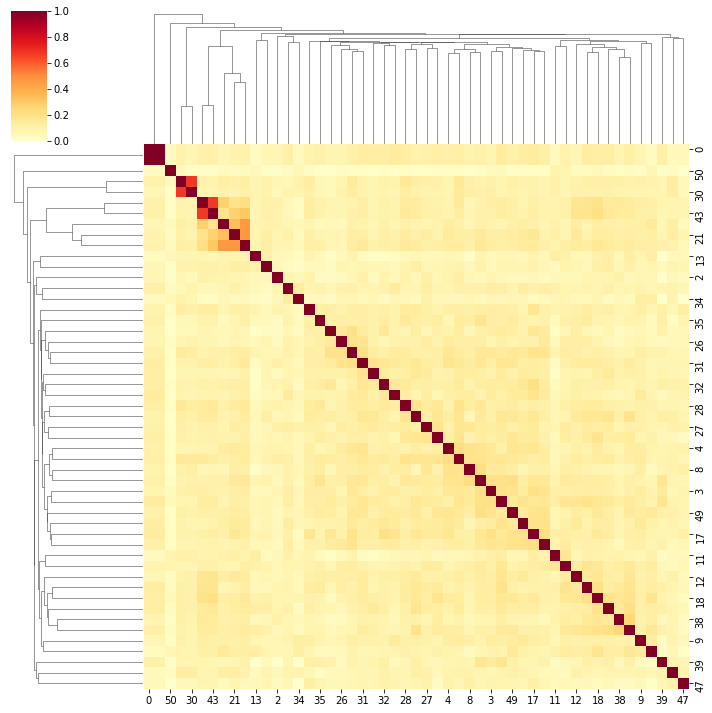

0.9945098039215686


<Figure size 3600x3000 with 0 Axes>

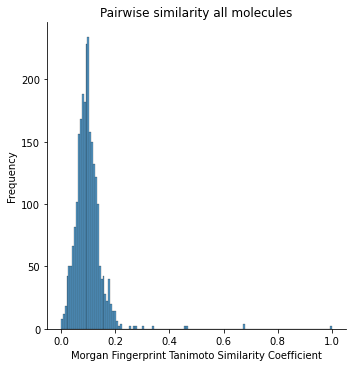

human_CL_mL_min_kg 302

302


/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 4500x3000 with 0 Axes>

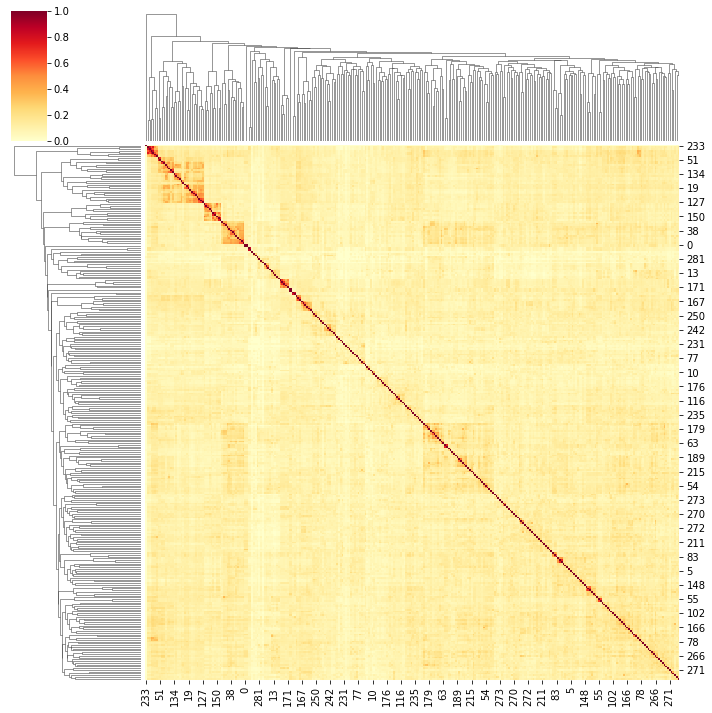

0.9927834371080945


<Figure size 3600x3000 with 0 Axes>

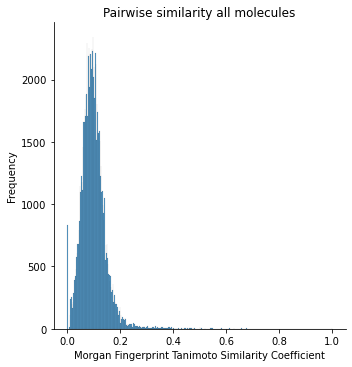

human_fup 34

34


<Figure size 4500x3000 with 0 Axes>

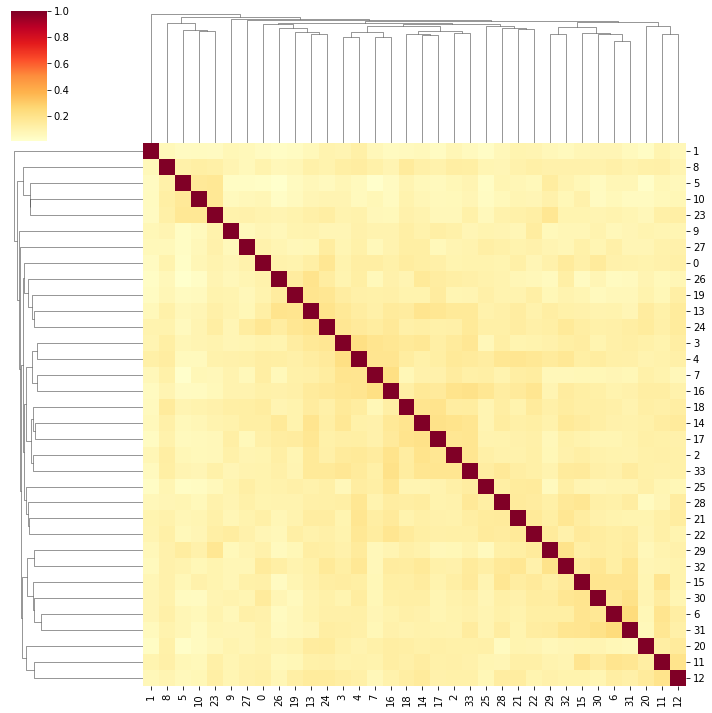

1.0


<Figure size 3600x3000 with 0 Axes>

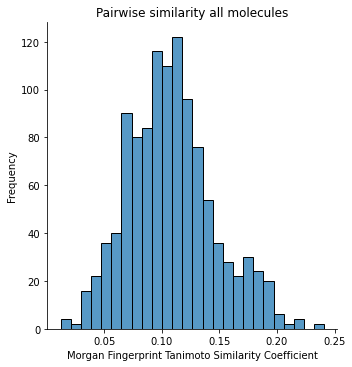

human_thalf 38

38


<Figure size 4500x3000 with 0 Axes>

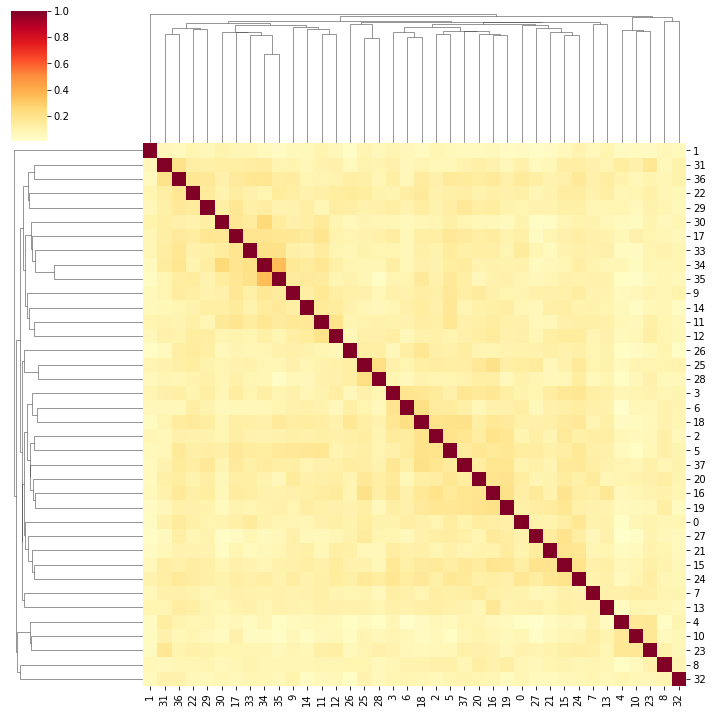

0.9985775248933144


<Figure size 3600x3000 with 0 Axes>

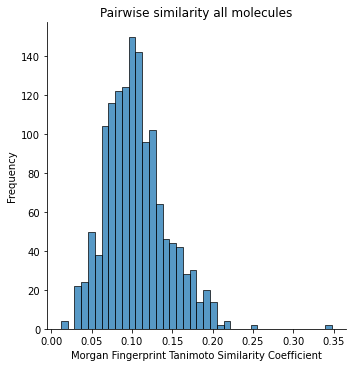

In [10]:
import pickle
import seaborn as sns

n_neighbours=5
for endpoint in ["human_VDss_L_kg","human_CL_mL_min_kg","human_fup","human_thalf"]:
    
    selected_dataset =df.dropna(subset=[endpoint]).reset_index(drop=True)
    print(endpoint, len(selected_dataset))
    df_final_aa = calculate_similarity_alldata(selected_dataset.iloc[:, :])
    df_final_aa = df_final_aa.sort_values('MFP_Tc', ascending=False)
    df_final_aa = df_final_aa.reset_index()
    df_final_aa


    '''df_final_aa_2 = pd.DataFrame()

    for compound in df_final_aa["query"].unique():

        #print(compound)

        compounds_wise = pd.DataFrame()
        compounds_wise = df_final_aa[df_final_aa["query"]==compound].sort_values("MFP_Tc", ascending=False).iloc[:n_neighbours, :]
        df_final_aa_2 = pd.concat([df_final_aa_2, compounds_wise])


    df_master = df_final_aa_2.groupby('query').mean().sort_values("MFP_Tc").reset_index()'''
    
    df_final_aa = df_final_aa.sort_values(by=["query", "target"])
    PW= df_final_aa.MFP_Tc.values.reshape(len(selected_dataset), len(selected_dataset))
    
    plt.figure(figsize=(15,10), dpi= 300)
    fg  = sns.clustermap(PW, cmap='YlOrRd')
    plt.show()
        
    df_final_aa = df_final_aa[df_final_aa["query"] != df_final_aa["target"]]
    df_final_aa
    
    print(len(df_final_aa[df_final_aa["MFP_Tc"]<0.30])/len(df_final_aa))
    
    plt.figure(figsize=(12,10), dpi= 300)
    sns.displot(df_final_aa["MFP_Tc"])
    plt.title('Pairwise similarity all molecules')
    # Add title and axis names

    plt.xlabel('Morgan Fingerprint Tanimoto Similarity Coefficient')
    plt.ylabel('Frequency')
    plt.show()


In [11]:
df_final_aa


,level_0,index,query,target,MFP_Tc
1393,1393,1,C1=C/COCc2cc(ccc2OCC[NH+]2CCCC2)Nc2nccc(n2)-c2...,C=C/C=C/C[C@@H](C)[C@@H](O)C1C(=O)NC(CC)C(=O)[...,0.045802
921,920,2,C1=C/COCc2cc(ccc2OCC[NH+]2CCCC2)Nc2nccc(n2)-c2...,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OC(C)C)c(-c3cn(C)c4c...,0.090226
809,806,3,C1=C/COCc2cc(ccc2OCC[NH+]2CCCC2)Nc2nccc(n2)-c2...,C=CC(=O)[NH+]1CC[C@H](n2nc(C#Cc3cc(OC)cc(OC)c3...,0.097345
1437,1437,4,C1=C/COCc2cc(ccc2OCC[NH+]2CCCC2)Nc2nccc(n2)-c2...,CC(=O)C1CC[C@H]2[C@@H]3CC[C@H]4C[C@](C)(O)CC[C...,0.031250
295,292,5,C1=C/COCc2cc(ccc2OCC[NH+]2CCCC2)Nc2nccc(n2)-c2...,CC(C)NC(=O)COc1cccc(-c2nc(Nc3ccc4[n-]ncc4c3)c3...,0.136364
...,...,...,...,...,...
833,833,1438,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,Nc1nc(=O)c2c([n-]1)[NH2+][C@@H]1O[C@@H]3COP(=O...,0.096154
539,541,1439,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,O=C(CCC(C(=O)[O-])[NH+]1CC[NH+](C(CCC(=O)NCC(O...,0.113402
263,263,1440,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,O=C([O-])CCC(NC(=O)NC(CCCCNC(=O)C(Cc1ccc2ccccc...,0.141667
418,418,1441,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,O=C([O-])CCC(NC(=O)NC(CCCCNC(=O)c1ccc([18F])nc...,0.123711


In [12]:
    
print(len(df_final_aa[df_final_aa["MFP_Tc"]<0.30])/len(df_final_aa))

0.9985775248933144
